<a href="https://colab.research.google.com/github/mzareer/Machine_Learning_AZ_1/blob/main/course1_section3_data_preprocessing_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Template

## Importing the libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Importing the dataset

In [16]:
dataset  = pd.read_csv('Data.csv')
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


 ## Importing the dataset

In [17]:

X = dataset.iloc[:,:-1].values # iloc : locate indexes [rows, columns]
y = dataset.iloc[:,-1].values # .values attribure helps extract data as numpy arrays

In [18]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [19]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Taking care of missing data:
1. delete the row with the missing data if you have a large dataset.

2. Give the missing data the value of the average of all other values in the dataset.

We will do the second option using the library sklearn

In [20]:
import sklearn
from sklearn.impute import SimpleImputer
# SimpleImputer: Univariate imputer for completing missing values with simple strategies.
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # filll the missing values with the average
imputer.fit(X[:,1:3]) # fit method finds the missing values
X[:,1:3] = imputer.transform(X[:,1:3]) # The transform method does the replacement
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## encoding the independent variables: categorical data :

categorical data like (yes and no) or name of countries need to be encoded so that we can use it in our machine learning model, for example we can also give names of countries as numbers. Note that its not advisable to encode countries by giving them 1,2,3 (sequentl numbers) as this can be interperted by the neural network as being related. So we use "one hot encoding"

# Hot coding :

for example we give 1 country the code "100" and the next "001" (of course this wil add three new columns)

one of the most important things about hotincoding that it does not creates a sequentual binry encoding.

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# object of the ColumnTransformer transformer class
# ColumnTransformer(which columns we want to encode,     remainder = which columns are not encoded)
# passthrough : means we need to keep the columns that will not use encoding on
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# fit_transform: does the fitting and transforiming at the same time
# note that the fit_transform method does not return a numpy array so we need to make it a numpy array
X = np.array(ct.fit_transform(X))
print(X)


[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# dierectly from pandas

# object of the ColumnTransformer transformer class
# ColumnTransformer(which columns we want to encode,     remainder = which columns are not encoded)
# passthrough : means we need to keep the columns that will not use encoding on
ct_pandas = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Country'])], remainder='passthrough')
# fit_transform: does the fitting and transforiming at the same time
# note that the fit_transform method does not return a numpy array so we need to make it a numpy array
X = np.array(ct_pandas.fit_transform(dataset))
print(X)


[[1.0 0.0 0.0 44.0 72000.0 'No']
 [0.0 0.0 1.0 27.0 48000.0 'Yes']
 [0.0 1.0 0.0 30.0 54000.0 'No']
 [0.0 0.0 1.0 38.0 61000.0 'No']
 [0.0 1.0 0.0 40.0 nan 'Yes']
 [1.0 0.0 0.0 35.0 58000.0 'Yes']
 [0.0 0.0 1.0 nan 52000.0 'No']
 [1.0 0.0 0.0 48.0 79000.0 'Yes']
 [0.0 1.0 0.0 50.0 83000.0 'No']
 [1.0 0.0 0.0 37.0 67000.0 'Yes']]


## encoding the dependent variables: purchased varuable (yes/no) output

In [22]:
# for this we use the label encoder from the sklearn library
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # create an object
y = le.fit_transform(y) # use the fit_transform
print(y)

[0 1 0 0 1 1 0 1 0 1]


In [10]:
# direcrly from pandas

# Use LabelEncoder to encode binary categorical data
le = LabelEncoder() # create an object
y = le.fit_transform(dataset['Purchased']) # use the fit_transform
print(y)

[0 1 0 0 1 1 0 1 0 1]


## splitting the data into training and test set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# random_state: this means that the data for the train and test se will be randomly selected

In [24]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


## Feature scalling :

allows us to put all our features on the same scale as to avoid some features being more prominent then others.

Feature scalling must be applied after splitting the training set and the test set, because the test set is supposed to be a brand new set to test the trained model.

feature scalling uses the mean and the standard diviation from the set, and if we use it before the data is split is to prevent information leakage which can happed.

standardisation: puts all the values of features between 3 and -3.

normalization: puts all feature values between 0 and 1.

which is better standarisation or normalization?

normalization is recommended when you have a normal distribution in most of your features, while standarisation works well al the time.

so we mostly use standarization.

Note: feature scallling is not applied to all machine elarning models.

Note: feature scalling must not be applied to teh dummy variables (variables like 0 or 1 that encode the counteries and catagorical data) in the dataset

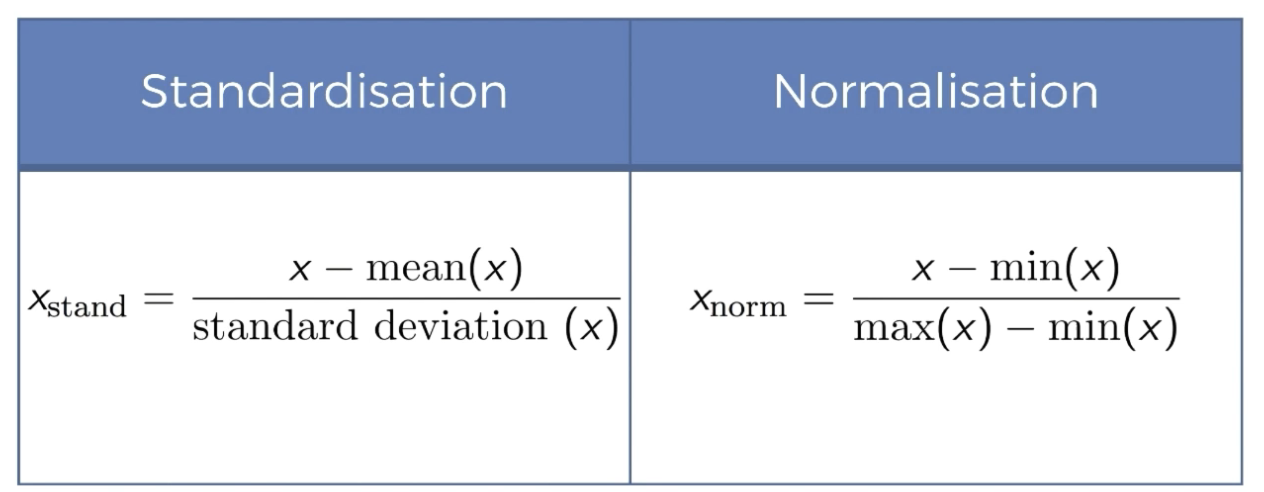

In [25]:
print("X_train\n", X_train)

X_train
 [[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [26]:
from sklearn.preprocessing import StandardScaler

# create an object of teh standardscaler class
sc = StandardScaler()
# fit calculates the mean and standard diviation of the whole x_train set and then applies the fit to transform the data
X_train[:,3:] = sc.fit_transform(X_train[:,3:])

'''
We apply the 'transform' function to 'x_test' to ensure it's on the same scale
 as 'x_train', which was scaled during preprocessing. Many machine learning
 algorithms require features to be on a similar scale for optimal performance.
 The scaling parameters are learned from 'x_train' and then applied to 'x_test'
 to simulate real-world conditions where new, unseen data needs to be in the same
 format as the training data for accurate predictions.
 If 'x_test' were scaled separately, it could introduce bias and hinder the model's performance.

'''
X_test[:,3:] = sc.transform(X_test[:,3:])

In [27]:
print("X_train", X_train)

X_train [[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


## sample code for dealing with Pandas directly

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Load the Wine Quality Red dataset
df = pd.read_csv('winequality-red.csv', delimiter=';')

# Separate features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Split the dataset into an 80-20 training-test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create an instance of the StandardScaler class
sc = StandardScaler()


# Fit the StandardScaler on the features from the training set and transform it
X_train = sc.fit_transform(X_train)

# Apply the transform to the test set
X_test = sc.transform(X_test)

# Print the scaled training and test datasets
print(X_train)
print(X_test)